In [1]:
## From: https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981

#import get to call a get request on the site
from requests import get

#get the first page of the housing prices
response = get('https://minneapolis.craigslist.org/search/apa?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print( len(posts)) #to double check I got 120 (elements/page)
post = posts[0]

<class 'bs4.element.ResultSet'>
120


In [2]:
curtime = post.find('time',class_='result-date')['datetime']
print(curtime)
cururl = post.find('a',class_='result-title hdrlnk')['href']
print(cururl)

2020-07-10 12:12
https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-live-in-luxury-in-the/7156898430.html


In [3]:
#curbrs = post.find('span', class_ = 'housing').text.split()[0][:-2]
#print(curbrs)

#cursqft = post.find('span', class_ = 'housing')
#if cursqft:
#    cursqft = cursqft.text.split()[2][:-3] #cleans the ft2 at the end
#    print(cursqft)
#print(cursqft)

curhood = post.find('span', class_='result-hood') 
if curhood:
    curhood = curhood.text
    print(curhood)



In [4]:
from geopy.geocoders import Nominatim, ArcGIS
curmap = BeautifulSoup(get(cururl).text,'html.parser').find_all('div',class_='mapbox')[0]
geolocator = Nominatim(user_agent="darren")

print(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])

location = geolocator.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])


geolocator2 = ArcGIS(user_agent="darren")
location2 = geolocator2.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'],
                                distance=500)





import numpy as np

loc = geolocator.reverse(query=str(np.round(float(curmap.find('div')['data-latitude'])-.001,3))
                   +","
                   +str(np.round(float(curmap.find('div')['data-longitude'])-.001,3)))
    
print(location.address)
print(location2.address)
print(loc.address)

#print(location.raw['address'])
#print(location.raw['address']['city'])
#print(location.raw['address']['neighbourhood'])
#print(location.raw['address']['postcode'])

44.950542,-93.295707
Fremont Avenue South, Lowry Hill East, Minneapolis, Hennepin County, Minnesota, 55408, United States of America
2885 S Fremont Ave, Minneapolis, Minnesota 55408, USA
Lowry Hill East, Minneapolis, Hennepin County, Minnesota, United States of America


In [5]:
curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
print(curmap)

[<div class="mapbox">
<div class="viewposting" data-accuracy="10" data-latitude="44.950542" data-longitude="-93.295707" id="map"></div>
<div class="mapaddress">2838 Fremont near 28th</div>
<p class="mapaddress">
<small>
            (<a href="https://www.google.com/maps/search/44.950542,-93.295707" target="_blank">google map</a>)
        </small>
</p>
</div>]


In [6]:
#new code to put here:
#get list of neighborhoods
#for each neighborhood,
#  get central coordinate
#for each posting
#  calculate distance from neighborhoods' centers
#  assign neighborhood based on nearest neighbor

In [7]:
#linkpfx = 'https://minneapolis.craigslist.org/search/apa?'
#linksfx =( 'sort=date'
#          +'&hasPic=1'
#          +'&bundleDuplicates=1'
#          +'&search_distance=20'
#          +'&postal=55454'
#          +'&min_price=500'
#          +'&max_price=4000'
#          +'&max_bedrooms=3'
#          +'&availabilityMode=0'
#          +'&sale_date=all+dates')
#response = get(linkpfx+linksfx)
#html_soup = BeautifulSoup(response.text, 'html.parser')
#results_num = html_soup.find('div', class_= 'search-legend')
#results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
#pages = np.arange(0, results_total+1, 120)
#print(results_total)
#print(pages)

#post.find('a', class_='result-title hdrlnk')['href'] in post_links
#post.find('a', class_='result-title hdrlnk')['href'] in 
#apts['URL'].str.contains(post.find('a', class_='result-title hdrlnk')['href']).sum()
#apts['URL'].str.contains('https://minneapolis.craigslist.org/dak/apa/d/burnsville-end-unit-2-bedroom-townhouse/7135839874.html').sum()

In [8]:
#build out the loop
from bs4 import BeautifulSoup
from time import sleep, time
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from IPython.core.display import clear_output
import numpy as np


citystr = 'minneapolis' ## 'washingtondc' #'minneapolis'
linkpfx = 'https://'+citystr+'.craigslist.org/search/apa?'
linksfx =( 'sort=date'
          +'&hasPic=1'
          +'&bundleDuplicates=1'
          +'&search_distance=20'
          +'&postal=55454' #55454' #DC: 20009
          +'&min_price=300'
          +'&max_price=8000'
          +'&max_bedrooms=4'
          +'&availabilityMode=0'
          +'&sale_date=all+dates')
response = get(linkpfx+linksfx)
html_soup = BeautifulSoup(response.text, 'html.parser')
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
pages = np.arange(0, results_total+1, 120)


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="derinkuyu",timeout=5)

#
TypeDict = {
    'apartment': 1, 
    'condo':2, 
    'cottage/cabin':3, 
    'duplex':4, 
    'flat':5, 
    'house':6, 
    'in-law':7, 
    'loft':8, 
    'townhouse':9, 
    'manufactured':10, 
    'assisted living':11, 
    'land':12}
LaundryDict = {
    'w/d in unit':1,
    'w/d hookups':2,
    'laundry in bldg':3,
    'laundry on site':4,
    'no laundry on site':5
}    
ParkingDict = {
    'carport':1,
    'attached garage':2,
    'detached garage':3,
    'off-street parking':4,
    'street parking':5,
    'valet parking':6,
    'no parking':7
}

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []


cities = []
towns = []
neighborhoods = []
zips = []


types = []
laundries = []
parkings = []

for page in pages:
    
    #get request
    response = get(linkpfx
                   + 's=' #parameter for defining page number
                   + str(page) #page in above array
                   + linksfx)    
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:
        
        curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
        curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
        
        if (post.find('span', class_ = 'result-hood') is not None) and curmap and (
        post.find('a', class_='result-title hdrlnk')['href'] not in post_links):

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #
            #curpost = get(post_link).text
            curmap = curmap[0] #BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')[0]
            location = geolocator.reverse(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])
            
            try: 
                cities.append(location.raw['address']['city'])
            except:
                try: 
                    cities.append(location.raw['address']['town'])
                except:
                    cities.append('')
            
            try: 
                towns.append(location.raw['address']['town'])
            except:
                towns.append('')
            
            try:
                neighborhoods.append(location.raw['address']['neighbourhood'])
            except:
                try: 
                    locshift1 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])+.001)+","+str(float(curmap.find('div')['data-longitude'])+.001))
                    neighborhoods.append(locshift1.raw['address']['neighbourhood'])
                except:                   
                    try: 
                        locshift2 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])-.001)+","+str(float(curmap.find('div')['data-longitude'])-.001))
                        neighborhoods.append(locshift2.raw['address']['neighbourhood'])
                    except:
                        try:
                            neighborhoods.append(location.raw['address']['town'])
                        except:
                            try:
                                neighborhoods.append(location.raw['address']['city'])
                            except:
                                neighborhoods.append('')
            
            try:
                zips.append(location.raw['address']['postcode'])
            except:
                zips.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                typename = list(set(curattr.text.split('\n')).intersection(list(TypeDict.keys())))[0]
                types.append(TypeDict[typename])
            except:
                types.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                laundryname = list(set(curattr.text.split('\n')).intersection(list(LaundryDict.keys())))[0]
                laundries.append(LaundryDict[laundryname])
            except:
                laundries.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                parkname = list(set(curattr.text.split('\n')).intersection(list(ParkingDict.keys())))[0]
                parkings.append(ParkingDict[parkname])
            except:
                parkings.append('')
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = int(post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

import pandas as pd

apts = pd.DataFrame({
    'posted': post_timing,
    'neighborhood': post_hoods,
    'post title': post_title_texts,
    'number bedrooms': bedroom_counts,
    'sqft': sqfts,
    'URL': post_links,
    'price': post_prices,
    'cities':cities,
    'towns':towns,
    'neighborhoods':neighborhoods,
    'zips': zips,
    'types':types,
    'parking':parkings,
    'laundry':laundries})
#print(apts.info())
#apts.head(30)
apts.shape

#drop duplicates
apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])

#make the number bedrooms to a float (since np.nan is a float too)
apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))

#convert datetime string into datetime object to be able to work with it
from datetime import datetime

apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

apts.to_csv(path_or_buf='./scraped_data/apts_'+citystr+"_"+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
apts.shape


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!
Page 22 scraped successfully!
Page 23 scraped successfully!
Page 24 scraped successfully!
Page 25 scraped successfully!
Page 26 scraped successfully!


Scrape complete!


(93, 14)

In [9]:
##drop duplicates
#apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
#
##make the number bedrooms to a float (since np.nan is a float too)
#apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))
#
##convert datetime string into datetime object to be able to work with it
#from datetime import datetime
#
#apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

#apts.to_csv(path_or_buf='./apts_'+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
#apts.shape

In [10]:
import os
import glob
citystr = 'minneapolis' #'minneapolis', 'washingtondc'

aptfiles = glob.glob('./scraped_data/apts_'+citystr+'*')


try:
    del apts
except:
    print('no apts in memory, loading some...')


for file in aptfiles:
    try: 
        apts = apts.append(pd.read_csv(file),ignore_index=True)
    except:
        apts = pd.read_csv(file)
#apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
apts = apts.drop_duplicates(subset=['price','sqft','number bedrooms','laundry','parking','zips','types','neighborhoods'])
apts = apts[apts['sqft']<2000]
apts = apts[apts['price']>559]
apts = apts[apts['price']<2500]
apts = apts[apts['price'] / apts['number bedrooms'] > 400]

print(str(apts.shape[0])+' unique listings found.')

2556 unique listings found.


In [11]:
from operator import itemgetter
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)
apt = apts.iloc[0]
zipcode = search.by_zipcode(str(apt['zips']))
zipDict = zipcode.to_dict()
NaN = np.nan
if 'medianIncome' not in apts.columns:
    apts['medianIncome'] = NaN
    apts = pd.concat([apts,pd.DataFrame(columns=list(map(itemgetter('x'), zipDict['population_by_age'][2]['values'])))])

print(apts.columns)

Index(['posted', 'neighborhood', 'post title', 'number bedrooms', 'sqft',
       'URL', 'price', 'cities', 'towns', 'neighborhoods', 'zips', 'types',
       'parking', 'laundry', 'medianIncome', 'Under 5', '5-9', '10-14',
       '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85 Plus'],
      dtype='object')


In [12]:

#index = 0
#apt = apts.iloc[index]
#zipcode = search.by_zipcode(str(apt['zips']))
#zipDict = zipcode.to_dict()
#income = np.float(zipDict['median_household_income'])
#popsByAge = np.array(list(map(itemgetter('y'), zipDict['population_by_age'][2]['values'] )) ) / zipDict['population']
#
#apts.loc[index,'medianIncome'] = income
#apts.loc[index,list(map(itemgetter('x'), zipDict['population_by_age'][2]['values']))] = popsByAge
#print(apts.iloc[0])
#
    

    
for index, apt in apts.iterrows():
    zipcode = search.by_zipcode(str(apt['zips']))
    zipDict = zipcode.to_dict()
    income = zipDict['median_household_income']
    if income is not None:
        apts.loc[index,'medianIncome'] = np.float(income)
        
    if zipDict['population_by_age'] is not None:
        popsByAge = list(map(itemgetter('y'), zipDict['population_by_age'][2]['values'] ))
        apts.loc[index,list(map(itemgetter('x'), zipDict['population_by_age'][2]['values']))] = np.array(popsByAge) / zipDict['population']

apts['pKids'] = apts[['Under 5', '5-9', '10-14']].sum(axis=1)
apts['pYouths'] = apts[['15-19']].sum(axis=1)
apts['pEarlyTwenties'] = apts[['20-24']].sum(axis=1)
apts['pLateTwenties'] = apts[['25-29']].sum(axis=1)
apts['pThirties'] = apts[['30-34','35-39']].sum(axis=1)
apts['pForties'] = apts[['40-44','45-49']].sum(axis=1)
apts['pFiftyPlus'] = apts[['50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 Plus']].sum(axis=1)

In [13]:
#from walkscore import WalkScoreAPI
#api_key = 'YOUR API KEY GOES HERE'
#
#walkscore_api = WalkScoreAPI(api_key = api_key)

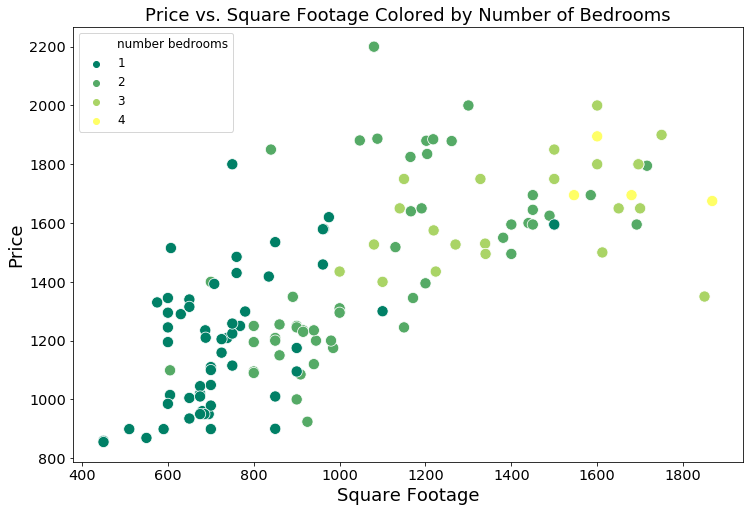

In [14]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft', y='price', hue='number bedrooms', palette='summer', x_jitter=True, y_jitter=True, s=125, data=apts.dropna())
plt.legend(fontsize=12)
plt.xlabel("Square Footage", fontsize=18)
plt.ylabel("Price", fontsize=18);
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=18);


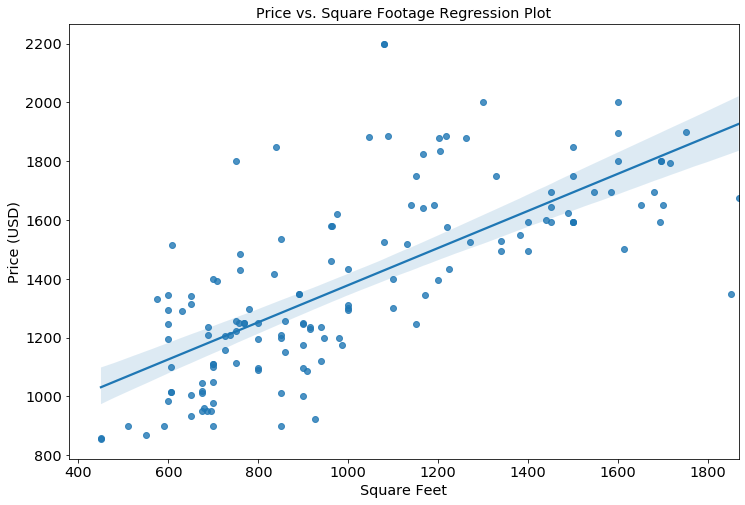

In [15]:
plt.figure(figsize=(12, 8))
sns.regplot(x='sqft', y='price', data=apts.dropna());
plt.title('Price vs. Square Footage Regression Plot');
plt.xlabel("Square Feet");
plt.ylabel("Price (USD)");

In [16]:
apts.corr()

number bedrooms      sqft     price     types   parking  \
number bedrooms         1.000000  0.795961  0.496513  0.387151  0.047971   
sqft                    0.795961  1.000000  0.592625  0.500014 -0.108973   
price                   0.496513  0.592625  1.000000  0.203080 -0.365672   
types                   0.387151  0.500014  0.203080  1.000000 -0.090129   
parking                 0.047971 -0.108973 -0.365672 -0.090129  1.000000   
laundry                -0.037651 -0.191804 -0.538824 -0.154730  0.573819   
medianIncome            0.038492  0.172405  0.083573  0.131681 -0.171983   
pKids                   0.099506  0.105976 -0.131790  0.132065  0.127933   
pYouths                 0.129276  0.041669 -0.107921  0.129875  0.148963   
pEarlyTwenties          0.021611 -0.090651  0.034839 -0.007337  0.098677   
pLateTwenties          -0.138719 -0.151669  0.164905 -0.119814 -0.040074   
pThirties              -0.097650 -0.094115  0.115974 -0.045443 -0.021014   
pForties                0.015134  0.048678  0.017500  0.091510 -0.013069   
pFiftyPlus             -0.020671  0.025002 -0.007373  0.020164 -0.048581   

                  laundry  medianIncome     pKids   pYouths  pEarlyTwenties  \
number bedrooms -0.037651      0.038492  0.099506  0.129276        0.021611   
sqft            -0.191804      0.172405  0.105976  0.041669       -0.090651   
price           -0.538824      0.083573 -0.131790 -0.107921        0.034839   
types           -0.154730      0.131681  0.132065  0.129875       -0.007337   
parking          0.573819     -0.171983  0.127933  0.148963        0.098677   
laundry          1.000000     -0.128541  0.079503  0.065178       -0.021092   
medianIncome    -0.128541      1.000000  0.332397 -0.002876       -0.570784   
pKids            0.079503      0.332397  1.000000  0.458032       -0.040290   
pYouths          0.065178     -0.002876  0.458032  1.000000        0.625519   
pEarlyTwenties  -0.021092     -0.570784 -0.040290  0.625519        1.000000   
pLateTwenties   -0.116629     -0.445421  0.041607 -0.071542        0.473850   
pThirties       -0.111370     -0.155503  0.411713  0.045164        0.292562   
pForties        -0.078707      0.740499  0.781666  0.316245        0.041535   
pFiftyPlus      -0.046421      0.395752  0.606829  0.252894       -0.011453   

                 pLateTwenties  pThirties  pForties  pFiftyPlus  
number bedrooms      -0.138719  -0.097650  0.015134   -0.020671  
sqft                 -0.151669  -0.094115  0.048678    0.025002  
price                 0.164905   0.115974  0.017500   -0.007373  
types                -0.119814  -0.045443  0.091510    0.020164  
parking              -0.040074  -0.021014 -0.013069   -0.048581  
laundry              -0.116629  -0.111370 -0.078707   -0.046421  
medianIncome         -0.445421  -0.155503  0.740499    0.395752  
pKids                 0.041607   0.411713  0.781666    0.606829  
pYouths              -0.071542   0.045164  0.316245    0.252894  
pEarlyTwenties        0.473850   0.292562  0.041535   -0.011453  
pLateTwenties         1.000000   0.880278  0.386732    0.254452  
pThirties             0.880278   1.000000  0.718601    0.525042  
pForties              0.386732   0.718601  1.000000    0.815548  
pFiftyPlus            0.254452   0.525042  0.815548    1.000000

In [17]:
apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()

number bedrooms    sqft   price  types  parking  laundry  \
neighborhoods                                                             
Anoka                      1.0   735.0  1060.0    1.0      NaN      4.0   
Apple Valley               1.0   857.0  1271.0    1.0      2.0      1.0   
Aquila                     1.0   750.0  1000.0    1.0      3.0      3.0   
Audubon Park               1.0   800.0   890.0    2.0      2.0      3.0   
Autumn Woods               1.0  1342.0  1885.0    1.0      2.0      1.0   
...                        ...     ...     ...    ...      ...      ...   
Whittier                   1.0   560.0  1010.0    1.0      4.0      3.0   
Willow Park                1.0   715.0  1525.0    1.0      2.0      1.0   
Windom                     1.0   650.0   925.0    1.0      3.0      3.0   
Windom Park                1.0  1000.0  1200.0    NaN      NaN      NaN   
Woodbury                   1.0   806.5  1424.5    5.0      2.0      1.0   

               medianIncome     pKids   pYouths  pEarlyTwenties  \
neighborhoods                                                     
Anoka               68130.0  0.214166  0.072597        0.058401   
Apple Valley        85602.0  0.247545  0.074100        0.047108   
Aquila              63699.0  0.159190  0.042854        0.067027   
Audubon Park        55486.0  0.172401  0.047740        0.063179   
Autumn Woods       102759.0  0.243626  0.077844        0.034343   
...                     ...       ...       ...             ...   
Whittier            46045.5  0.158134  0.041269        0.107066   
Willow Park         63699.0  0.159190  0.042854        0.067027   
Windom              94177.0  0.000000  0.000000        0.000000   
Windom Park         55486.0  0.172401  0.047740        0.063179   
Woodbury            99620.0  0.259517  0.064315        0.041386   

               pLateTwenties  pThirties  pForties  pFiftyPlus  
neighborhoods                                                  
Anoka               0.067117   0.139239  0.163596    0.284885  
Apple Valley        0.058312   0.150709  0.174973    0.247254  
Aquila              0.124634   0.157827  0.128322    0.320144  
Audubon Park        0.097414   0.179391  0.140506    0.299369  
Autumn Woods        0.048704   0.114736  0.203559    0.277188  
...                      ...        ...       ...         ...  
Whittier            0.165920   0.173902  0.121989    0.222763  
Willow Park         0.124634   0.157827  0.128322    0.320144  
Windom              0.000000   0.000000  0.000000    0.000000  
Windom Park         0.097414   0.179391  0.140506    0.299369  
Woodbury            0.065057   0.152707  0.173268    0.243751  

[111 rows x 14 columns]

In [18]:
#apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()['price'].sort_values()

In [19]:
#apts[apts['number bedrooms']<=brlim]['neighborhoods'].unique()

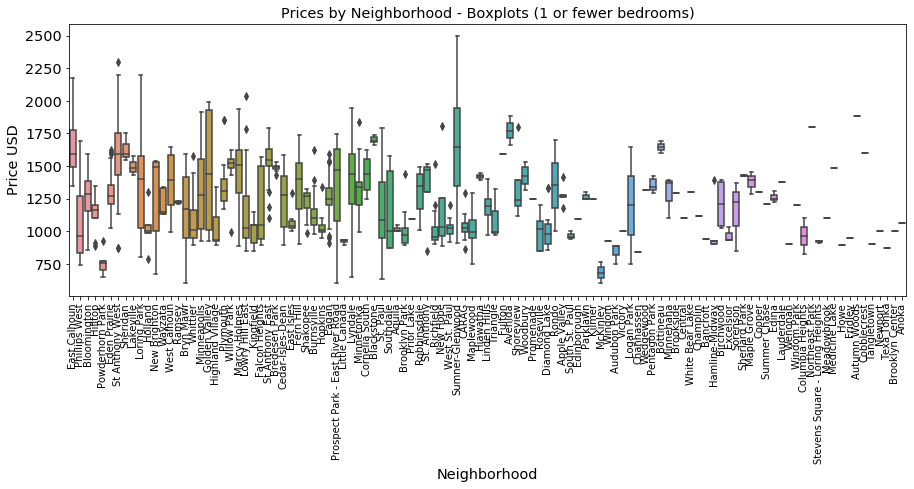

In [20]:
brlim = 1
sns.boxplot(x='neighborhoods', y='price', data=apts[apts['number bedrooms']<=brlim])
            #order=sorted(apts[apts['number bedrooms']<=brlim]['neighborhoods'].unique()))
plt.xlabel("Neighborhood");
plt.xticks(rotation=90,size=10)
plt.ylabel("Price USD");
plt.title("Prices by Neighborhood - Boxplots ("+str(brlim)+" or fewer bedrooms)");

In [21]:
# drop problematic cols
apts = apts.dropna(subset=['price','number bedrooms','sqft','neighborhoods','types','laundry','parking',
                           'medianIncome','pKids','pYouths','pEarlyTwenties','pLateTwenties','pThirties',
                           'pForties','pFiftyPlus'])
print(apts.shape)

# recode neighborhoods
apts_onehot = apts.copy()
apts_onehot = pd.get_dummies(apts_onehot, columns=['cities'], prefix = ['ct'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['neighborhoods'], prefix = ['nb'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['types'], prefix = ['ty'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['laundry'], prefix = ['ld'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['parking'], prefix = ['pk'])
apts_onehot['parking'] = apts['parking']
apts_onehot['laundry'] = apts['laundry']
apts_onehot['cities'] = apts['cities']

#print(apts_onehot)

(2008, 40)


In [22]:
from sklearn import preprocessing
from sklearn import linear_model

maincols = ['number bedrooms','sqft','medianIncome',
            'pKids','pYouths','pEarlyTwenties','pLateTwenties','pThirties','pForties','pFiftyPlus']
#nbcols = [col for col in apts_onehot if col.startswith('ct')]
#for c in nbcols:
#    maincols.append(c) 
nbcols = [col for col in apts_onehot if col.startswith('nb')]
for c in nbcols:
    maincols.append(c) 
tycols = [col for col in apts_onehot if col.startswith('ty')]
for c in tycols:
    maincols.append(c) 
pkcols = [col for col in apts_onehot if col.startswith('pk')]
for c in pkcols:
    maincols.append(c) 
ldcols = [col for col in apts_onehot if col.startswith('ld')]
for c in ldcols:
    maincols.append(c) 

# set up regression
y = apts_onehot['price'].values.reshape(-1,1)
X = apts_onehot[maincols].values
thresh = .5 # drop columns that correlate above this value
cor = np.abs(np.corrcoef(X.T))
p = np.argwhere(np.triu(np.isclose(cor,1),1))
X = np.delete(X,p[:,1],axis=1)
X = preprocessing.scale(X)
print("Number observations: "+str(X.shape[0]))

#OLS
reg = linear_model.LinearRegression()
reg.fit(y=y,X=X)
apts_onehot['price_est'] = np.zeros((apts_onehot.shape[0],1))
apts_onehot['price_est'] = reg.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100

# Ridge regression approach
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [.005, .01, .025, .05, .10, .5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X=X,y=y)
print("Ridge params (best): "+str(ridge_regressor.best_params_))
print("Ridge score (best): "+str(ridge_regressor.best_score_))
apts_onehot['price_est'] = ridge_regressor.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100


Number observations: 2008
Ridge params (best): {'alpha': 128}
Ridge score (best): -43112.818462182026


In [23]:
#pd.options.display.max_colwidth = 200
#pd.options.display.max_rows = 600
#
#apts_onehot[(apts_onehot['price_difpct']<=10) & 
#            (apts_onehot['sqft']>=699) & 
#            (apts_onehot['price']<=1200) & 
#            (apts_onehot['number bedrooms']<=2)].sort_values('price_difpct',ascending=True)[['URL','price_difpct']] 

In [24]:
#Prepare data:
prices = np.array(apts_onehot['price'])
features = np.array(apts_onehot[maincols])
feature_list = list(apts_onehot[maincols])

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, prices, test_size = 0.20, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1606, 183)
Training Labels Shape: (1606,)
Testing Features Shape: (402, 183)
Testing Labels Shape: (402,)


In [26]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error: $', round(np.mean(errors), 2), '.')

Mean Absolute Error: $ 112.56 .


In [28]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.23 %.


In [29]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')


In [30]:
from IPython.display import Image 
Image("tree.png")

In [31]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sqft                 Importance: 0.52
Variable: ld_1.0               Importance: 0.17
Variable: pYouths              Importance: 0.04
Variable: number bedrooms      Importance: 0.03
Variable: pKids                Importance: 0.03
Variable: pLateTwenties        Importance: 0.03
Variable: pThirties            Importance: 0.03
Variable: medianIncome         Importance: 0.01
Variable: pEarlyTwenties       Importance: 0.01
Variable: pForties             Importance: 0.01
Variable: pFiftyPlus           Importance: 0.01
Variable: ty_1.0               Importance: 0.01
Variable: ty_4.0               Importance: 0.01
Variable: pk_2.0               Importance: 0.01
Variable: pk_4.0               Importance: 0.01
Variable: nb_Andover           Importance: 0.0
Variable: nb_Anoka             Importance: 0.0
Variable: nb_Apple Valley      Importance: 0.0
Variable: nb_Aquila            Importance: 0.0
Variable: nb_Arden Hills       Importance: 0.0
Variable: nb_Audubon Park      Importance: 0.

In [35]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 600

apts_onehot['price_est_rf'] = rf.predict(features)
apts_onehot['price_dif_rf'] = apts_onehot['price']-apts_onehot['price_est_rf']
apts_onehot['price_difpct_rf'] = (apts_onehot['price_dif_rf'] / apts_onehot['price_est_rf']) * 100

apts_onehot[(apts_onehot['price_difpct_rf']<=15) & 
            (apts_onehot['parking'] <=4 ) &
            ((apts_onehot['laundry']==1) | (apts_onehot['laundry']==3) | (apts_onehot['laundry']==4)) & 
            (apts_onehot['sqft']>=500) & 
            (apts_onehot['price']<=1500) & 
            ((apts_onehot['cities']=='Minneapolis') | (apts_onehot['cities']=='Robbinsdale') |
             (apts_onehot['cities']=='Saint Louis Park') | (apts_onehot['cities']=='Richfield') |
             (apts_onehot['cities']=='St. Anthony') | (apts_onehot['cities']=='St. Paul') | 
             (apts_onehot['cities']=='New Brighton') | (apts_onehot['cities']=='Edina')) &
            (apts_onehot.index>=4500)].sort_values('price_difpct_rf',ascending=True)[['posted','URL','price_difpct','price_difpct_rf']] 

posted  \
4743  2020-07-08 13:04:00   
5121  2020-07-10 11:30:00   
4728  2020-07-08 06:39:00   
4775  2020-07-08 12:31:00   
5004  2020-07-10 09:12:00   
4689  2020-07-08 08:32:00   
4944  2020-07-09 14:19:00   
4585  2020-07-07 19:16:00   
4605  2020-07-07 18:58:00   
4985  2020-07-09 14:04:00   
4784  2020-07-08 12:15:00   
4598  2020-07-07 19:03:00   
5008  2020-07-10 09:09:00   
4574  2020-07-07 19:55:00   
4767  2020-07-08 12:37:00   
4904  2020-07-09 14:53:00   
4599  2020-07-07 19:03:00   
4687  2020-07-08 08:42:00   
5161  2020-07-10 11:10:00   
4653  2020-07-07 17:54:00   
5109  2020-07-10 11:38:00   
4597  2020-07-07 19:06:00   
5091  2020-07-10 11:53:00   
4825  2020-07-09 10:13:00   
4727  2020-07-08 06:39:00   
5013  2020-07-10 09:06:00   
4771  2020-07-08 12:34:00   
4620  2020-07-07 18:40:00   
4615  2020-07-07 18:48:00   
4764  2020-07-08 12:38:00   
5086  2020-07-10 12:00:00   
5090  2020-07-10 11:53:00   
4536  2020-07-07 15:23:00   
4758  2020-07-08 12:41:00   
4613  2020-07-07 18:48:00   
5014  2020-07-10 09:05:00   
4520  2020-07-07 15:34:00   
4936  2020-07-09 14:25:00   
4741  2020-07-08 01:52:00   
4945  2020-07-09 14:17:00   
4506  2020-07-07 15:47:00   
4529  2020-07-07 15:26:00   
4819  2020-07-08 11:54:00   
5024  2020-07-10 08:57:00   
5160  2020-07-10 11:10:00   
4538  2020-07-07 15:21:00   
4921  2020-07-09 14:35:00   
5135  2020-07-10 11:19:00   
4543  2020-07-07 15:20:00   
5124  2020-07-10 11:29:00   
5119  2020-07-10 11:30:00   
4537  2020-07-07 15:22:00   
4500  2020-07-07 15:58:00   
4581  2020-07-07 19:29:00   
4544  2020-07-07 15:20:00   
5106  2020-07-10 11:41:00   
5122  2020-07-10 11:30:00   
5110  2020-07-10 11:37:00   
4697  2020-07-08 08:18:00   
5115  2020-07-10 11:32:00   
4937  2020-07-09 14:25:00   
4678  2020-07-08 09:03:00   
4750  2020-07-08 12:51:00   
4798  2020-07-08 12:09:00   
4939  2020-07-09 14:24:00   
5114  2020-07-10 11:32:00   
4514  2020-07-07 15:41:00   
5094  2020-07-10 11:52:00   
4647  2020-07-07 17:56:00   
4569  2020-07-07 20:09:00   
4970  2020-07-09 14:11:00   
4751  2020-07-08 12:51:00   
5023  2020-07-10 08:57:00   
4948  2020-07-09 14:16:00   
4993  2020-07-09 13:59:00   
4559  2020-07-07 15:13:00   
4748  2020-07-08 12:58:00   

                                                                                                       URL  \
4743    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-remodeled-1-bed-available/7154252760.html   
5121   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-fully-updated-very-spacious/7156867366.html   
4728   https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-nice-one-bedroom-apartment/7151474799.html   
4775     https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-spacious-1-bedroom-in-st/7155685727.html   
5004        https://minneapolis.craigslist.org/ram/apa/d/saint-paul-garage-parking-laundry/7156771499.html   
4689        https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-you-deserve-quality-2/7155524173.html   
4944   https://minneapolis.craigslist.org/ram/apa/d/saint-paul-upper-duplex-in-midway-area/7156387744.html   
4585    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-3-bed-1-bath-upper-duplex/7145371781.html   
4605            https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-br-townhome-style/7142376532.html   
4985      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-new-one-bedroom-skyline/7156376475.html   
4784    https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-large-2-bd-1-ba-in-uptown/7155680733.html   
4598         https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-2-bdrm-available-mid/7144056201.html   
5008  https://minneapolis.craigslist.org/ram/apa/d/saint-paul-2-bedroom-on-snelling-avenue/7156769956.html   
4574      https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-900-1bd-in-marcy-holmes/7155353675.html   
4767         https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-1st-month-free-urban/7153825953.html

In [33]:
query_address = "2310 Aldrich Avenue South, Minneapolis 55405"